In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ppercca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ppercca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('Reviews_Movies.csv', delimiter = '\t', quoting = 3)

In [3]:
df.shape

(25000, 2)

In [31]:
df['Review'][100]

'i find it so amazing that even after all these years  we are still talking about this movie  obviously this movie wasn  t that bad or else people wouldn  t even bother to talk about it . i personally enjoyed this film immensly  and still do  i guess this film isn  t for everyone  but it certainly did touch the hearts of many .  br    br   as for those that think that this film is  overrated  or  over  hyped  . . . well  we only have the movie  going public to thank for that  lol you see  it  s not critics  article writers that make a film  huge  or a  hit  with the general movie  going public . people make the film a huge success . with titanic  everyone was in awe . let  s face it  a film like this had never been made before . at least not with the type of special effects needed to really capture the essence of the ship actually sinking . this film is so accurate that even james cameron timed the actual sinking of the ship in the film with the real sinking that fateful day in april  

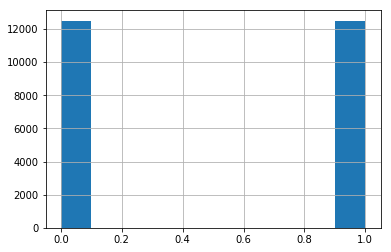

In [4]:
df["Liked"].hist()

In [5]:
df.head()

,Review,Liked
0,bromwell high is a cartoon comedy . it ran at ...,1
1,story of a man who has unnatural feelings for ...,0
2,homelessness or houselessness as george carli...,1
3,airport starts as a brand new luxury pla...,0
4,brilliant over acting by lesley ann warren . ...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
Review    25000 non-null object
Liked     25000 non-null int64
dtypes: int64(1), object(1)
memory usage: 390.7+ KB


In [7]:
df.describe()

,Liked
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [8]:
df['Number of Words'] = df['Review'].apply(RegexpTokenizer(r'\w+').tokenize).apply(len)
print(df.head())

                                              Review  Liked  Number of Words
0  bromwell high is a cartoon comedy . it ran at ...      1              140
1  story of a man who has unnatural feelings for ...      0              114
2  homelessness  or houselessness as george carli...      1              447
3  airport    starts as a brand new luxury    pla...      0              786
4  brilliant over  acting by lesley ann warren . ...      1              150


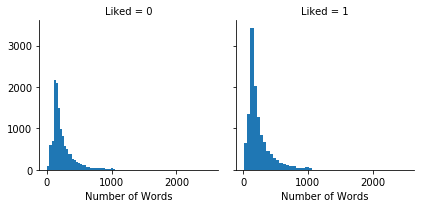

In [9]:
g = sns.FacetGrid(data=df, col='Liked')
g.map(plt.hist, 'Number of Words', bins=50)


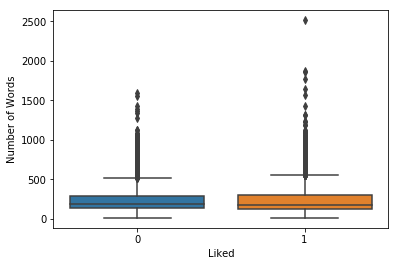

In [10]:
sns.boxplot(x='Liked', y='Number of Words', data=df)

In [11]:
filtered_reviews = []
tokened_reviews = []
reviews = []

In [12]:
for review in df["Review"]:
    reviews.append(review.rstrip().lower())
    stop_words = set(stopwords.words('english'))

for review in reviews:
    word_tokens = RegexpTokenizer(r'\w+').tokenize(review)
    tokened_reviews.append(word_tokens)
    filtered_review = [w for w in word_tokens if not w in stop_words]
    filtered_review = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_review.append(w)
    filtered_reviews.append(filtered_review)

In [13]:
sum_tokened_reviews = 0
sum_filtered_reviews = 0

for filtered_review in filtered_reviews:
    sum_filtered_reviews = sum_filtered_reviews + len(filtered_review)

print ("\n------------- Cantidad promedio de palabras por comentario: -------------")
print (df['Number of Words'].mean())

print ("\n------------- Cantidad promedio de palabras filtradas por comentario: -------------")
print (sum_filtered_reviews/len(filtered_reviews))



------------- Cantidad promedio de palabras por comentario: -------------
240.80784

------------- Cantidad promedio de palabras filtradas por comentario: -------------
123.57448


In [14]:
filtered_positive_reviews = []
filtered_negative_reviews = []
positive_reviews = []
negative_reviews = []
# For Positive Reviews
for review in df.loc[df["Liked"]==1]["Review"]:
    positive_reviews.append(review.rstrip().lower())
    stop_words = set(stopwords.words('english'))

for review in positive_reviews:
    word_tokens = RegexpTokenizer(r'\w+').tokenize(review)
    filtered_positive_review = [w for w in word_tokens if not w in stop_words]
    filtered_positive_review = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_positive_review.append(w)
    filtered_positive_reviews.append(filtered_positive_review)

In [15]:
flat_plist = [item for sublist in filtered_positive_reviews for item in sublist] 

In [16]:
from collections import Counter 
Counter = Counter(flat_plist)
most_occur = Counter.most_common(100) 
print(most_occur)

[('br', 49235), ('film', 20937), ('movie', 19074), ('one', 13655), ('like', 9038), ('good', 7720), ('story', 6780), ('time', 6515), ('great', 6419), ('well', 6405), ('see', 6026), ('also', 5550), ('really', 5476), ('would', 5400), ('even', 4964), ('first', 4755), ('much', 4685), ('people', 4479), ('best', 4319), ('love', 4301), ('get', 4272), ('life', 4199), ('way', 4036), ('made', 3823), ('films', 3813), ('many', 3766), ('two', 3733), ('think', 3655), ('movies', 3586), ('characters', 3560), ('character', 3514), ('man', 3460), ('show', 3432), ('watch', 3424), ('seen', 3414), ('little', 3341), ('still', 3340), ('make', 3303), ('could', 3237), ('never', 3226), ('know', 2833), ('years', 2758), ('ever', 2734), ('end', 2696), ('real', 2568), ('scene', 2567), ('back', 2547), ('though', 2475), ('new', 2458), ('go', 2440), ('acting', 2437), ('plot', 2432), ('world', 2429), ('scenes', 2427), ('say', 2414), ('makes', 2390), ('better', 2381), ('work', 2346), ('young', 2343), ('old', 2311), ('find

In [17]:
# For Negative Reviews
for review in df.loc[df["Liked"]==0]["Review"]:
    negative_reviews.append(review.rstrip().lower())
    stop_words = set(stopwords.words('english'))

for review in negative_reviews:
    word_tokens = RegexpTokenizer(r'\w+').tokenize(review)
    filtered_negative_review = [w for w in word_tokens if not w in stop_words]
    filtered_negative_review = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_negative_review.append(w)
    filtered_negative_reviews.append(filtered_negative_review)

In [18]:
flat_nlist = [item for sublist in filtered_negative_reviews for item in sublist] 

In [19]:
from collections import Counter 
Counter = Counter(flat_nlist)
most_occur = Counter.most_common(100) 
print(most_occur)

[('br', 52637), ('movie', 24965), ('film', 19218), ('one', 13134), ('like', 11238), ('even', 7687), ('good', 7423), ('bad', 7401), ('would', 7036), ('really', 6262), ('time', 6209), ('see', 5452), ('story', 5208), ('much', 5078), ('get', 5037), ('people', 4806), ('make', 4722), ('could', 4686), ('made', 4541), ('first', 4306), ('well', 4254), ('plot', 4154), ('movies', 4080), ('acting', 4056), ('way', 3989), ('think', 3643), ('also', 3608), ('characters', 3600), ('watch', 3550), ('character', 3506), ('better', 3358), ('know', 3334), ('seen', 3265), ('ever', 3263), ('never', 3259), ('two', 3173), ('little', 3096), ('films', 3077), ('nothing', 2990), ('say', 2982), ('end', 2954), ('something', 2942), ('many', 2909), ('thing', 2866), ('show', 2862), ('scene', 2816), ('scenes', 2785), ('go', 2717), ('great', 2640), ('watching', 2640), ('man', 2516), ('worst', 2480), ('actually', 2449), ('actors', 2437), ('life', 2429), ('back', 2424), ('director', 2405), ('funny', 2336), ('going', 2319), (